In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as  pd
file_path = '/content/drive/MyDrive/100+ Machine Learning Projects with Source Code [2024]/Healthcare/Data for healthcare/Dataset---Disease-Prediction-Using--Machine-Learning (1).csv'
df = pd.read_csv(file_path)
print(df.shape)


(42, 133)


In [ ]:
## Does mydata is clean?
# check missing data
import pandas as pd
missing_value = df.isnull().sum()
print(missing_value)




itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [ ]:
#check outliner - writing boxplot
import matplotlib.pyplot as plt
numerical_colums = df.select_dtypes(include = ['int64', 'float64']).columns
outliner = pd.DataFrame()
for column in numerical_colums:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  is_outliner = (df[column] < (Q1 - 1.5*IQR)) | (df[column] > (Q3 + 1.5*IQR))
  outliner[column] = is_outliner
outliner_counts = outliner.sum()
print(outliner_counts[outliner_counts > 0])

itching                 7
skin_rash               8
nodal_skin_eruptions    1
continuous_sneezing     2
shivering               1
                       ..
small_dents_in_nails    1
inflammatory_nails      1
blister                 1
red_sore_around_nose    2
yellow_crust_ooze       1
Length: 128, dtype: int64


<ipython-input-5-360bc269f6c3>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outliner[column] = is_outliner
<ipython-input-5-360bc269f6c3>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  outliner[column] = is_outliner
<ipython-input-5-360bc269f6c3>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()

In [ ]:
# check duplicate
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]
print(duplicate_count)

0


In [ ]:
data_types = df.dtypes
print(data_types)

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object


# Feature Relationship
1. feature important by using randomforestClassifier



In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# X là tập dữ liệu đặc trưng, y là biến mục tiêu
X = df.drop(columns=['prognosis'])  # Bỏ cột đích 'prognosis'
y = df['prognosis']
model = RandomForestClassifier()
model.fit(X, y)

# Lấy feature importance từ mô hình RandomForest
importances = model.feature_importances_

# Đưa vào DataFrame để xem dễ dàng hơn
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sắp xếp các feature theo độ quan trọng
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                 Feature  Importance
0                itching    0.024311
14               fatigue    0.023926
34                nausea    0.022672
97           muscle_pain    0.020441
11              vomiting    0.020177
..                   ...         ...
72         brittle_nails    0.001754
17  cold_hands_and_feets    0.001667
88         loss_of_smell    0.001439
70   puffy_face_and_eyes    0.000754
45        fluid_overload    0.000000

[132 rows x 2 columns]


In [ ]:
X = X.drop('fluid_overload', axis = 1)

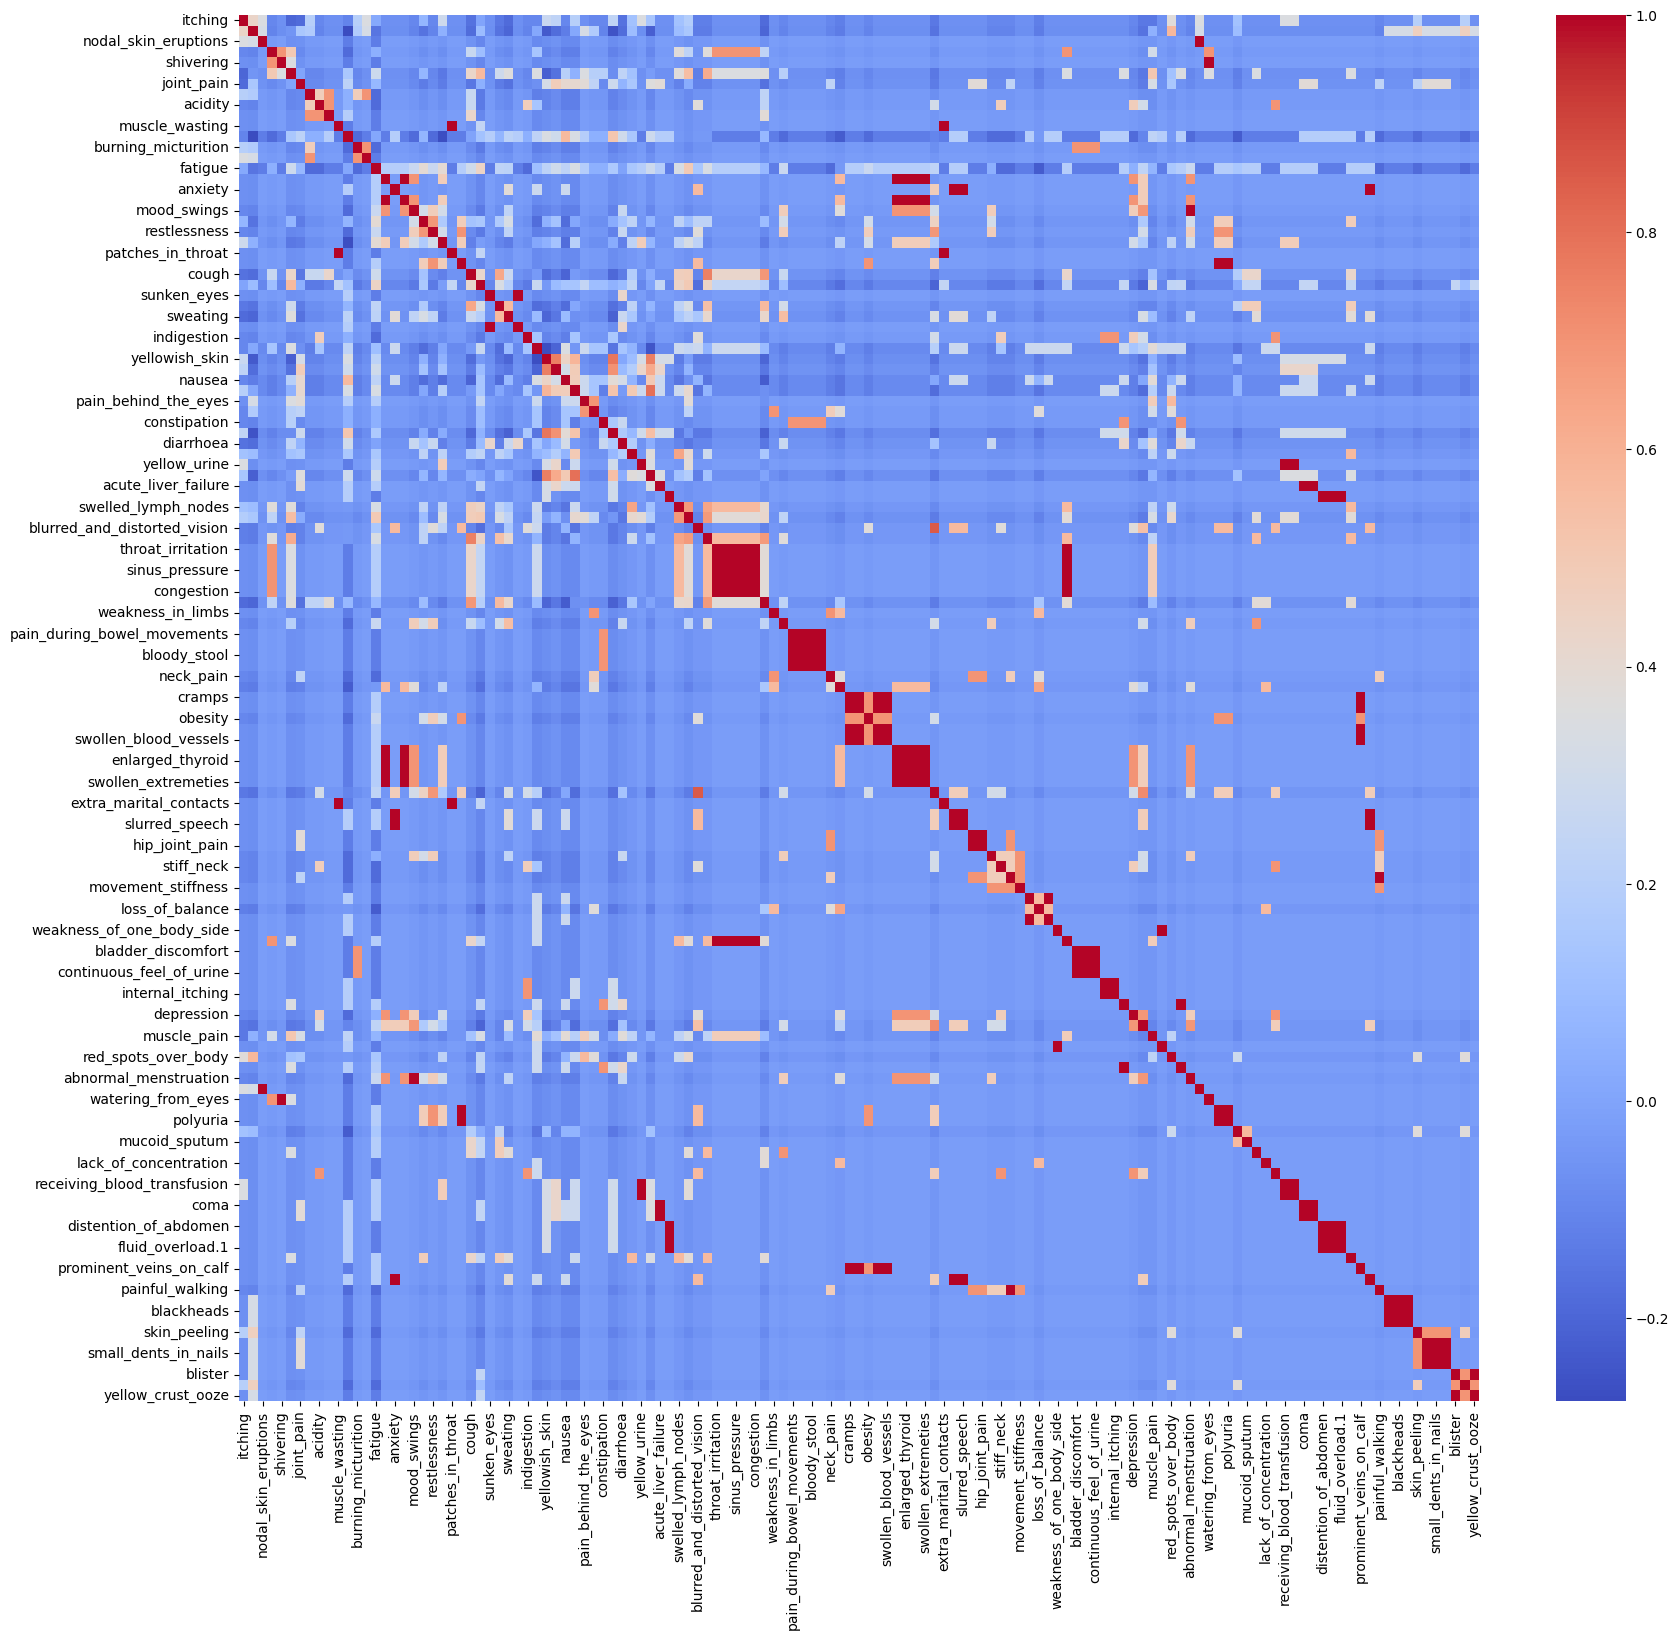

In [ ]:
# person correlation
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20, 18))
corr_matrix = X.corr(method = 'pearson')

sns.heatmap(corr_matrix, annot = False, cmap = 'coolwarm')
plt.tight_layout
plt.show()

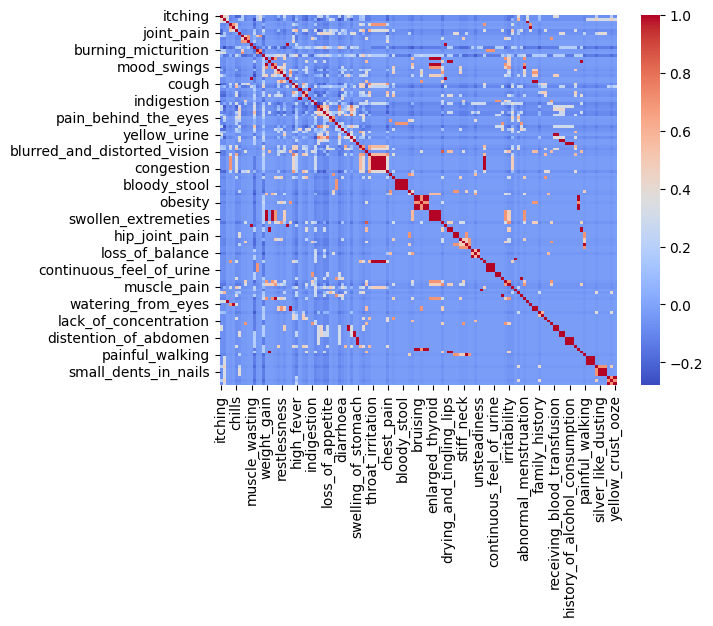

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr_matrix = X.corr(method = 'spearman')
sns.heatmap(corr_matrix, annot = False, cmap = 'coolwarm')
plt.tight_layout
plt.show()

[]

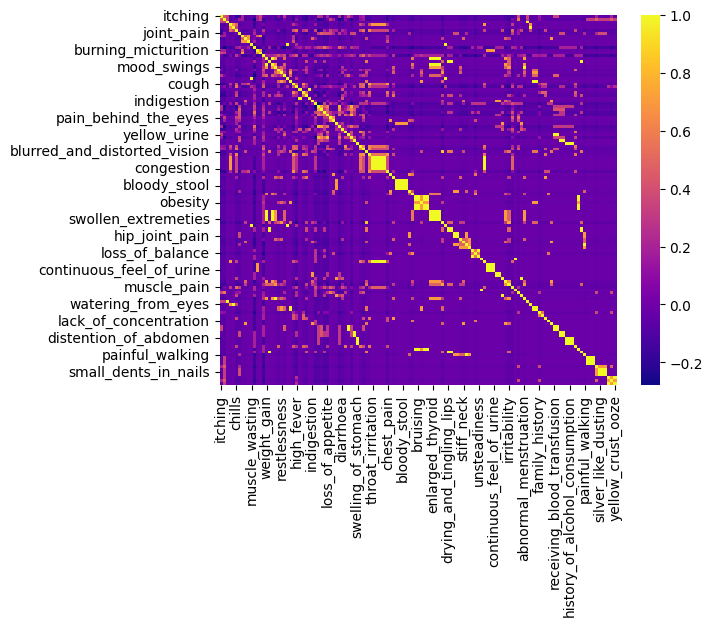

In [ ]:
#Kendall correlation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

corr_matrix = X.corr(method = 'kendall')
sns.heatmap(corr_matrix, annot = False, cmap = 'plasma')
plt.tight_layout
plt.plot()

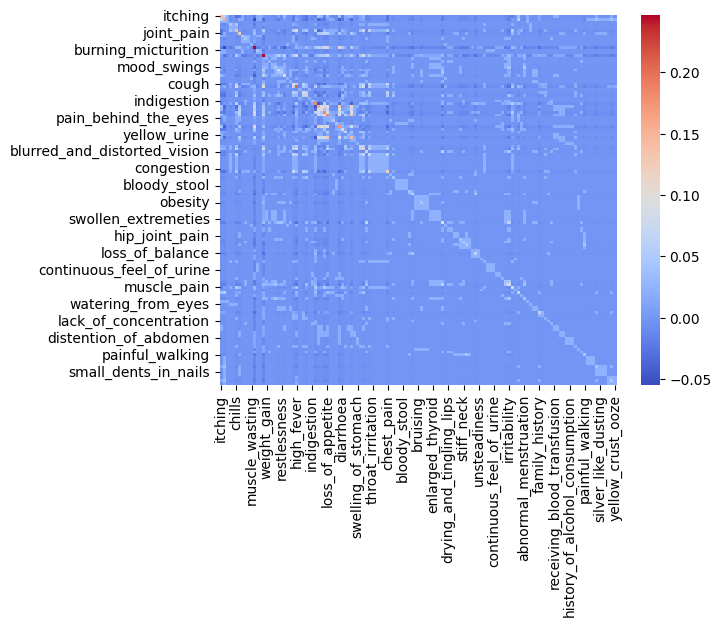

In [ ]:
#covariance matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cov_matrix = X.cov()
sns.heatmap(cov_matrix, annot = False, cmap = 'coolwarm')
plt.show()

#

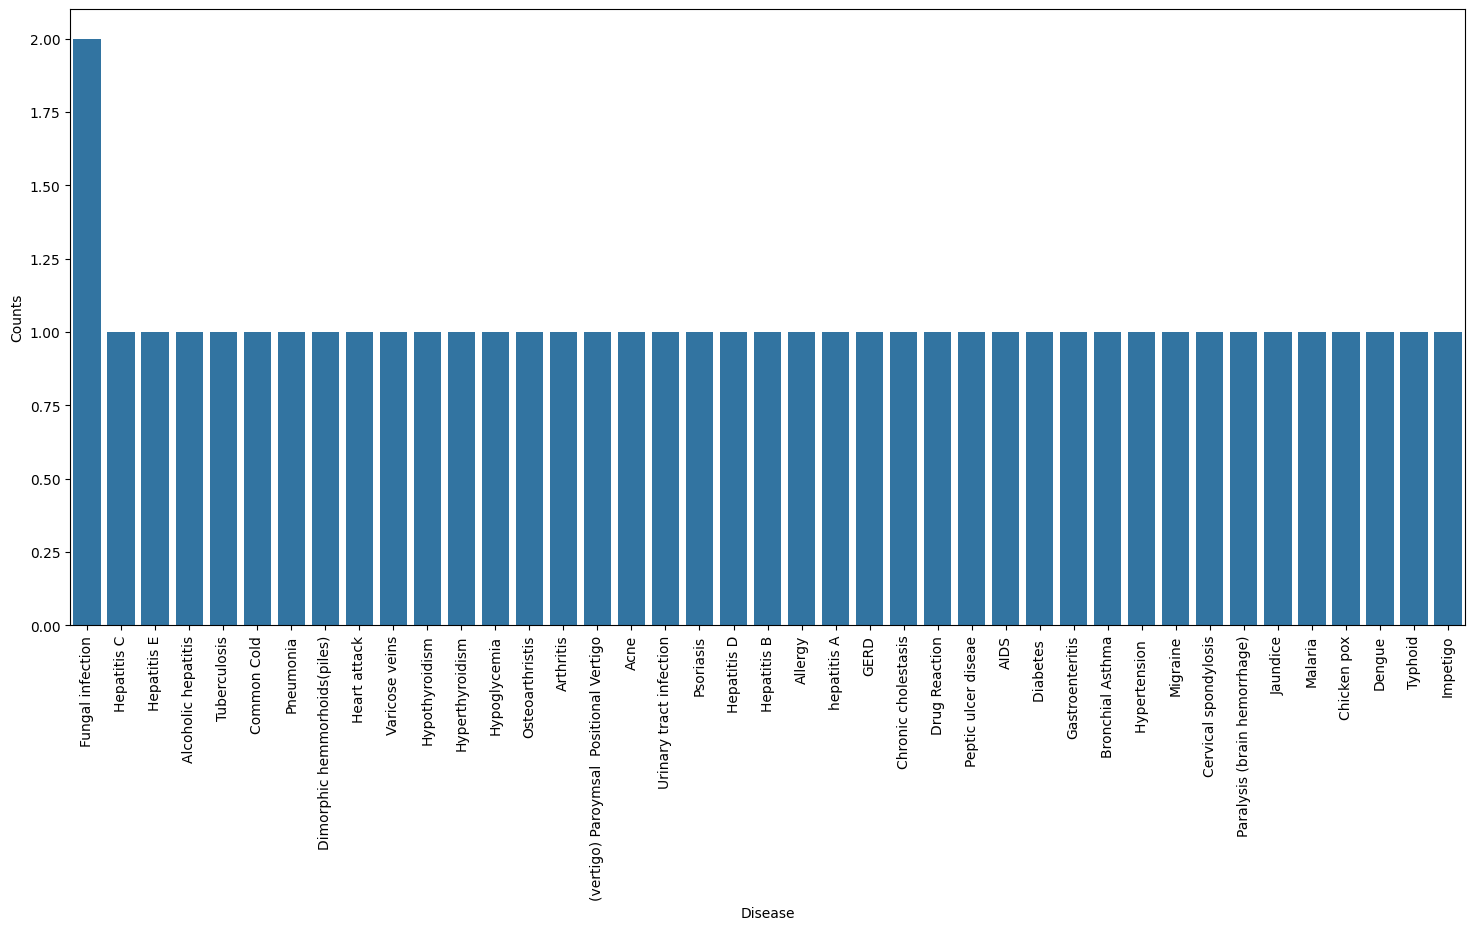

In [ ]:
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# endcoding target value in to number
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])


In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,: -1]
y = df.iloc[:, -1]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4)
print(f"train: {X_train.shape}, {y_train.shape}" )

X_val, X_test, y_val, y_test =  train_test_split(X_temp, y_temp, test_size = 0.3)

print(f"test: {X_test.shape}, {y_test.shape}")
print(f"val: {X_val.shape}, {y_val.shape}")

train: (25, 132), (25,)
test: (6, 132), (6,)
val: (11, 132), (11,)


In [ ]:
#using K-Fold Cross Validation for model selection

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np

# creating a dictionary in this
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state = 18)
}

def cv_scoring(estimator, X, y):
  return accuracy_score(y, estimator.predict(X))

for model_name in models:
  model = models[model_name]
  scores = cross_val_score(model, X, y, cv = 2, n_jobs = -1, scoring = 'accuracy')
  print(model_name)
  print(f"Score: {scores}")
  print(f"Mean score: {np.mean(scores)}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


SVC
Score: [0.         0.04761905]
Mean score: 0.023809523809523808
Gaussian NB
Score: [0.         0.04761905]
Mean score: 0.023809523809523808


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Random Forest
Score: [0.         0.04761905]
Mean score: 0.023809523809523808


Accuracy on Test dataset on combine model: 100.0


<Axes: >

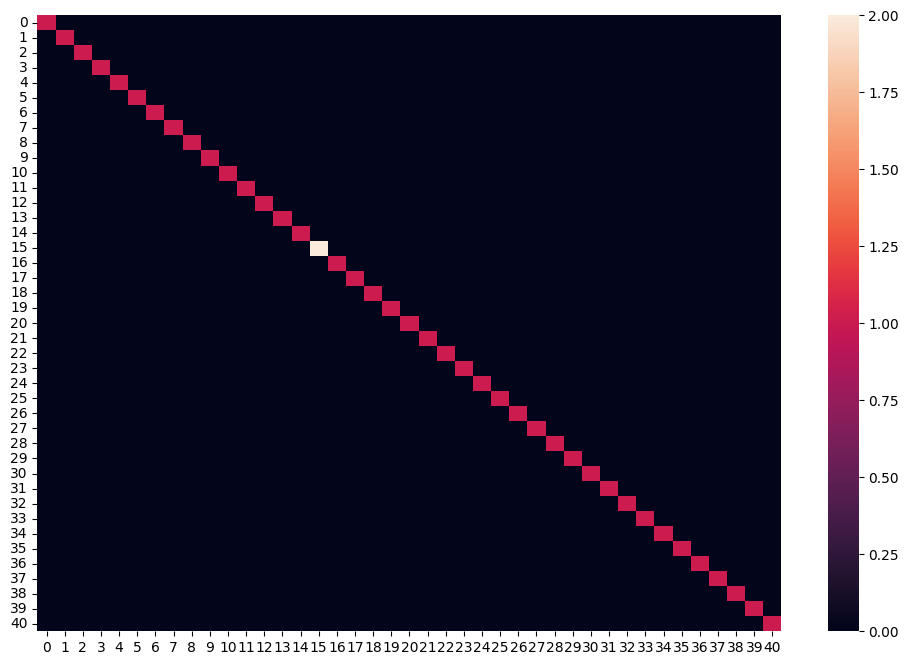

In [ ]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state = 18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

test_X = df.iloc[:,: -1]
test_Y = df.iloc[:, -1]

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

from scipy import stats

final_preds = [stats.mode([i,j,k])[0] for i, j ,k in zip(svm_preds, nb_preds, rf_preds)]

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(f"Accuracy on Test dataset on combine model: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot = False)



In [ ]:
# Creating a function that can take systoms as input ans generate prediction for disease
symptoms = X.columns.values
symptom_index = {}

for index, value in enumerate(symptoms):
  symptom = " ".join(i.capitalize() for i in value.split("_"))
  symptom_index[symptom] = index

data_dict = {
    "symptom_index": symptom_index,
    "predictions_classes": encoder.classes_
}


def predictDisease(symptoms):
  symptoms = symptoms.split(",")
  input_data = [0] * len(data_dict["symptom_index"])
  for symptom in symptoms:
    index = data_dict["symptom_index"][symptom]
    input_data[index] = 1

  input_data = np.array(input_data).reshape(1,-1)
  rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
  nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
  svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
  import statistics
  final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction)
  predictions = {
      "rf_model_prediction": rf_prediction,
      "naive_bayes_prediction": nb_prediction,
      "svm_model_prediction": svm_prediction,
      "final_prediction": final_prediction
  }
  return predictions
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


TypeError: mode() takes 1 positional argument but 3 were given